# Data Importing

In [47]:
import pandas as pd
df = pd.read_csv('/kaggle/input/laptop-data-set/laptop.csv')

In [ ]:
df2 = pd.read_csv('/kaggle/input/laptop-data-set/laptop.csv')

In [ ]:
df2

In [ ]:
df2.head()

In [115]:
df['Brand_Tecno'].unique()

array([0., 1.])

In [50]:
# 1. Replace 'No HDD' with 0
df['HDD'] = df['HDD'].replace('No HDD', '0 GB HDD Storage')

# 2. Extract the numeric values from the 'HDD' column
df['HDD'] = df['HDD'].str.extract('(\d+)').astype(float)

# Now the 'HDD' column should have numeric values representing the HDD capacity
# For example, '1024 GB HDD Storage' becomes 1024, 'No HDD' becomes 0, etc.

print(df['HDD'].head())  # Check the processed values


0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: HDD, dtype: float64


In [51]:
# 2. Extract the numeric values from the 'HDD' column
df['RAM'] = df['RAM'].str.extract('(\d+)').astype(float)

# Now the 'HDD' column should have numeric values representing the HDD capacity
# For example, '1024 GB HDD Storage' becomes 1024, 'No HDD' becomes 0, etc.

print(df['RAM'].head())  # Check the processed values


0     4.0
1     8.0
2    16.0
3     8.0
4     8.0
Name: RAM, dtype: float64


In [52]:
df['RAM'].unique()

array([ 4.,  8., 16., 32., 18., 64., 12., 36.,  2., 24.,  6.,  3.])

In [53]:
df['Adapter'] = df['Adapter'].replace('no', '0').astype(float)


In [54]:
df['Adapter'].unique()

array([ 45.,  65.,  56.,   0., 150., 170., 230., 135.,  41., 100.,  90.,
       120.,  96., 180.,  63.,  30.,  54.,  33.,  46.,  67.,  57.,  43.,
        48.,  70.,  37.,  24.,  42., 330., 200.,  58., 240.,  50., 280.,
        60.,  80.,  35.,  51.,  61.,  76.,  38.,  86.,  66., 210.,  39.,
        97., 140.,  83.,  59.,  53.,  71.,  75.,  74.,  49., 300.,  68.,
        52.,  40.,  36.,  32.,  15.,  26.,  47.,  64., 130.,  87.,  72.,
        95.,  69.])

In [55]:
df['SSD'].unique()

array(['64 GB SSD Storage', '512 GB SSD Storage', 'NO SSD',
       '1024 GB SSD Storage', '256 GB SSD Storage', '256 GB SSD Storage ',
       '128 GB SSD Storage', '128 GB SSD Storage ', '512 GB SSD Storage ',
       '512  SSD Storage', '2048 GB SSD Storage', '1 GB SSD Storage',
       '8 GB SSD Storage ', '16 GB SSD Storage ', '32 GB SSD Storage',
       '16 GB SSD Storage', '256  SSD Storage ', '4098 GB SSD Storage',
       '32 GB SSD Storage '], dtype=object)

In [56]:
df['RAM'].unique()

array([ 4.,  8., 16., 32., 18., 64., 12., 36.,  2., 24.,  6.,  3.])

In [57]:
# 1. Replace 'Not Expandable' with '0 GB Expandable'
df['RAM_Expandable'] = df['RAM_Expandable'].replace('Not Expandable', '0 GB Expandable')

# 2. Extract the numeric values from the 'RAM_Expandable' column
df['RAM_Expandable'] = df['RAM_Expandable'].str.extract('(\d+)').astype(float)

# Now the 'RAM_Expandable' column should have numeric values representing the expandable RAM
# For example, '12 GB Expandable' becomes 12, 'Not Expandable' becomes 0, etc.

print(df['RAM_Expandable'].head())  # Check the processed values


0     0.0
1    12.0
2    32.0
3     8.0
4     0.0
Name: RAM_Expandable, dtype: float64


In [58]:
# 1. Replace 'NO SSD' with '0 GB SSD Storage'
df['SSD'] = df['SSD'].replace('NO SSD', '0 GB SSD Storage')

# 2. Extract the numeric values from the 'SSD' column
df['SSD'] = df['SSD'].str.extract('(\d+)').astype(float)

# Now the 'SSD' column should contain numeric values representing the SSD capacity
# For example, '1024 GB SSD Storage' becomes 1024, 'NO SSD' becomes 0, etc.

print(df['SSD'].head())  # Check the processed values


0     64.0
1    512.0
2    512.0
3    512.0
4    512.0
Name: SSD, dtype: float64


In [59]:
df["Display"].unique()

array(['11.6 ', '15.6 ', '14 ', '16 ', '17.3 ', '13.3 ', '16.1 ', '13.6 ',
       '14.2 ', '14.1 ', '15.3 ', '13.4 ', '15 ', '10.5 ', '13.5 ', '13 ',
       '12.4 ', '16.2 ', 'OLED Display With Touchscreen', '14.0 ', '17 ',
       '18 ', '14.5 ', '12 ', '10.1 ', '15. ', '14.9 ', '11 ', '12.3 ',
       '16.6 ', '12.2 ', '12.5 ', '15.4 ', '12.0 '], dtype=object)

In [60]:
# 1. Strip any extra spaces
df['Display'] = df['Display'].str.strip()

df['Display'].replace('OLED Display With Touchscreen', '12.2')

# 2. Extract numeric values and convert to float, handle non-numeric entries by setting them to NaN
df['Display'] = pd.to_numeric(df['Display'], errors='coerce')

# Check the cleaned 'Display' column
print(df['Display'].unique())

[11.6 15.6 14.  16.  17.3 13.3 16.1 13.6 14.2 14.1 15.3 13.4 15.  10.5
 13.5 13.  12.4 16.2  nan 17.  18.  14.5 12.  10.1 14.9 11.  12.3 16.6
 12.2 12.5 15.4]


In [61]:
from sklearn.preprocessing import OneHotEncoder
categorical_columns = ['Brand', 'Processor_Name', 'Processor_Brand',
                       'RAM_TYPE', 'Display_type', 'GPU', 'GPU_Brand',
                       'Battery_Life', 'Ghz']

# 10. Apply One-Hot Encoding using Scikit-learn's OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' avoids multicollinearity

encoded_columns = encoder.fit_transform(df[categorical_columns])

# 11. Convert the encoded columns back to a DataFrame and add it to the original DataFrame
encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(categorical_columns))

# 12. Drop the original categorical columns and merge with the encoded columns
df.drop(columns=categorical_columns, inplace=True)
df = pd.concat([df.reset_index(drop=True), encoded_df], axis=1)


In [62]:
df.head()

Unnamed: 0                                               Name  Price  \
0           0  HP Chromebook 11A-NA0002MU (2E4N0PA) Laptop (1...  22990   
1           1  Lenovo Ideapad Slim 3 (82KU017KIN) Laptop (15....  36289   
2           3  Dell G15-5520 (D560822WIN9B) Laptop (15.6 Inch...  78500   
3           4  HP 15s-fy5007TU (91R03PA) Laptop (15.6 Inch | ...  55490   
4           6  Infinix Inbook Y2 Plus XL29 Laptop (15.6 Inch ...  21990   

   RAM_Expandable   RAM  Display    SSD  HDD  Adapter  Brand_AVITA  ...  \
0             0.0   4.0     11.6   64.0  0.0     45.0          0.0  ...   
1            12.0   8.0     15.6  512.0  0.0     65.0          0.0  ...   
2            32.0  16.0     15.6  512.0  0.0     56.0          0.0  ...   
3             8.0   8.0     15.6  512.0  0.0      0.0          0.0  ...   
4             0.0   8.0     15.6  512.0  0.0     45.0          0.0  ...   

   Ghz_ 3.0 Ghz Processor  Ghz_ 3.1 Ghz Processor  Ghz_ 3.3 Ghz Processor  \
0                     0.0                     0.0                     0.0   
1                     0.0                     0.0                     0.0   
2                     0.0                     0.0                     1.0   
3                     0.0                     0.0                     0.0   
4                     0.0                     0.0                     0.0   

   Ghz_ 3.4 Ghz Processor  Ghz_ 4.0 Ghz Processor  Ghz_ 4.2 Ghz Processor  \
0                     0.0                     0.0                     0.0   
1                     0.0                     1.0                     0.0   
2                     0.0                     0.0                     0.0   
3                     0.0                     0.0                     1.0   
4                     0.0                     0.0                     0.0   

   Ghz_ 4.7 Ghz Processor  Ghz_ 4.8 Ghz Processor  Ghz_ 5.5 Ghz Processor  \
0                     0.0                     0.0                     0.0   
1                     0.0                     0.0                     0.0   
2                     0.0                     0.0                     0.0   
3                     0.0                     0.0                     0.0   
4                     0.0                     0.0                     0.0   

   Ghz_0  
0    0.0  
1    0.0  
2    0.0  
3    0.0  
4    0.0  

[5 rows x 732 columns]

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3976 entries, 0 to 3975
Columns: 732 entries, Unnamed: 0 to Ghz_0
dtypes: float64(729), int64(2), object(1)
memory usage: 22.2+ MB


In [64]:
df.dropna(inplace=True)


In [65]:
df.drop(columns=['Unnamed: 0'], inplace=True)


In [66]:
# Drop unnecessary column
df.drop(columns=['Name'], inplace=True)


In [76]:
df['Brand_Apple'].unique()

array([0., 1.])

In [116]:
# Include all columns (numerical and categorical) in the summary
df.describe(include='all')


Price  RAM_Expandable          RAM      Display          SSD  \
count    3975.000000     3975.000000  3975.000000  3975.000000  3975.000000   
mean    72403.102893       10.892579    11.145157    15.068956   461.865409   
std     52181.233161       15.664714     6.356647     1.029635   347.459914   
min      7990.000000        0.000000     2.000000    10.100000     0.000000   
25%     39866.500000        0.000000     8.000000    14.000000   256.000000   
50%     58990.000000        0.000000     8.000000    15.600000   512.000000   
75%     84990.000000       16.000000    16.000000    15.600000   512.000000   
max    503890.000000       64.000000    64.000000    18.000000  4098.000000   

               HDD      Adapter  Brand_AVITA   Brand_Acer  Brand_Apple  ...  \
count  3975.000000  3975.000000  3975.000000  3975.000000  3975.000000  ...   
mean    246.394214    64.594969     0.005786     0.081006     0.012327  ...   
std     445.689863    58.829687     0.075856     0.272879     0.110355  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.000000    41.000000     0.000000     0.000000     0.000000  ...   
50%       0.000000    65.000000     0.000000     0.000000     0.000000  ...   
75%       0.000000    65.000000     0.000000     0.000000     0.000000  ...   
max    2048.000000   330.000000     1.000000     1.000000     1.000000  ...   

       Ghz_ 3.0 Ghz Processor  Ghz_ 3.1 Ghz Processor  Ghz_ 3.3 Ghz Processor  \
count             3975.000000             3975.000000             3975.000000   
mean                 0.034717                0.020629                0.049560   
std                  0.183085                0.142156                0.217061   
min                  0.000000                0.000000                0.000000   
25%                  0.000000                0.000000                0.000000   
50%                  0.000000                0.000000                0.000000   
75%                  0.000000                0.000000                0.000000   
max                  1.000000                1.000000                1.000000   

       Ghz_ 3.4 Ghz Processor  Ghz_ 4.0 Ghz Processor  Ghz_ 4.2 Ghz Processor  \
count             3975.000000             3975.000000             3975.000000   
mean                 0.034465                0.026918                0.083270   
std                  0.182444                0.161865                0.276325   
min                  0.000000                0.000000                0.000000   
25%                  0.000000                0.000000                0.000000   
50%                  0.000000                0.000000                0.000000   
75%                  0.000000                0.000000                0.000000   
max                  1.000000                1.000000                1.000000   

       Ghz_ 4.7 Ghz Processor  Ghz_ 4.8 Ghz Processor  Ghz_ 5.5 Ghz Processor  \
count             3975.000000             3975.000000             3975.000000   
mean                 0.061384                0.046038                0.004277   
std                  0.240063                0.209593                0.065265   
min                  0.000000                0.000000                0.000000   
25%                  0.000000                0.000000                0.000000   
50%                  0.000000                0.000000                0.000000   
75%                  0.000000                0.000000                0.000000   
max                  1.000000                1.000000                1.000000   

             Ghz_0  
count  3975.000000  
mean      0.056352  
std       0.230630  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000  

[8 rows x 730 columns]

- 25% (Q1): 39,866.50 — 25% of laptops are priced below this amount.
- 50% (Median): 58,990.00 — 50% of laptops are priced below this amount.
- 75% (Q3): 84,990.00 — 75% of laptops are priced below this amount.

In [68]:
# Check the data types of all columns
print(df.dtypes)

Price                       int64
RAM_Expandable            float64
RAM                       float64
Display                   float64
SSD                       float64
                           ...   
Ghz_ 4.2 Ghz Processor    float64
Ghz_ 4.7 Ghz Processor    float64
Ghz_ 4.8 Ghz Processor    float64
Ghz_ 5.5 Ghz Processor    float64
Ghz_0                     float64
Length: 730, dtype: object


# Data Cleaning

In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Shuffle and sample a portion of the data (e.g., 20%)
sampled_df = df.sample(frac=0.02, random_state=42)  # Use 20% of the data

# Step 2: Calculate the correlation matrix on the sampled data
correlation_matrix = sampled_df.corr()


In [78]:
import numpy as np

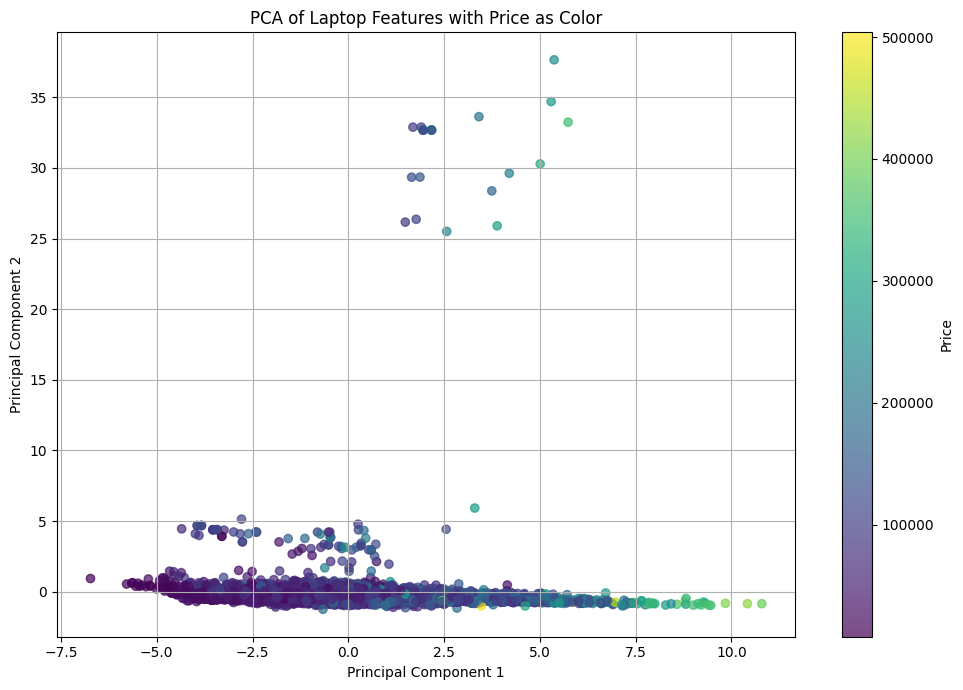

In [84]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# 1. Standardize the data (important for PCA)
# Use only the numeric columns, excluding the Price itself for PCA
numeric_df = df.select_dtypes(include=[float, int]).drop(columns=['Price'])

scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

# 2. Apply PCA
pca = PCA(n_components=2)  # We'll reduce the data to 2 components for visualization
pca_result = pca.fit_transform(scaled_data)

# 3. Create a DataFrame for the PCA results and include the Price for coloring
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['Price'] = df['Price'].values  # Add the Price column

# 4. Create a scatter plot with Price as color
plt.figure(figsize=(10, 7))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Price'], cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Price')  # Add a color bar to show the Price scale
plt.title('PCA of Laptop Features with Price as Color')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.tight_layout()
plt.show()


In [85]:
pip install plotly


Note: you may need to restart the kernel to use updated packages.


In [89]:
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 1. Standardize the data (important for PCA)
# Use only the numeric columns, excluding the Price itself for PCA
numeric_df = df.select_dtypes(include=[float, int]).drop(columns=['Price'])

scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

# 2. Apply PCA
pca = PCA(n_components=2)  # We'll reduce the data to 2 components for visualization
pca_result = pca.fit_transform(scaled_data)

# 3. Create a DataFrame for the PCA results and include other columns for hover information
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['Price'] = df2['Price']  # Add the Price column
pca_df['Brand'] = df2['Brand']  # Add the Brand column
pca_df['Name'] = df2['Name']    # Add the Laptop Name column

# 4. Create an interactive scatter plot using Plotly
fig = px.scatter(
    pca_df, x='PC1', y='PC2', color='Price', hover_data=['Name', 'Brand', 'Price'],
    title='PCA of Laptop Features with Hover Info and Price as Color',
    labels={'PC1': 'Principal Component 1', 'PC2': 'Principal Component 2'}
)

# 5. Show the interactive plot
fig.show()


In [98]:
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 1. Standardize the data (important for PCA)
# Use only the numeric columns, excluding the Price itself for PCA
numeric_df = df.select_dtypes(include=[float, int]).drop(columns=['Price'])

scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

# 2. Apply PCA
pca = PCA(n_components=10)  # We'll reduce the data to 3 components for 3D visualization
pca_result = pca.fit_transform(scaled_data)

# 3. Create a DataFrame for the PCA results and include other columns for hover information
pca_df = pd.DataFrame(data=pca_result)
pca_df['Price'] = df2['Price']  # Add the Price column
pca_df['Brand'] = df2['Brand']  # Add the Brand column
pca_df['Name'] = df2['Name']    # Add the Laptop Name column

# 4. Create an interactive 3D scatter plot using Plotly
fig = px.scatter_3d(
    pca_df, x=0, y=1, z=2, color='Price', hover_data=['Name', 'Brand', 'Price'],
    title='3D PCA of Laptop Features with Hover Info and Price as Color',
    labels={'PC1': 'Principal Component 1', 'PC2': 'Principal Component 2', 'PC3': 'Principal Component 3'},
    opacity=0.7
)

# 5. Show the interactive plot
fig.show()


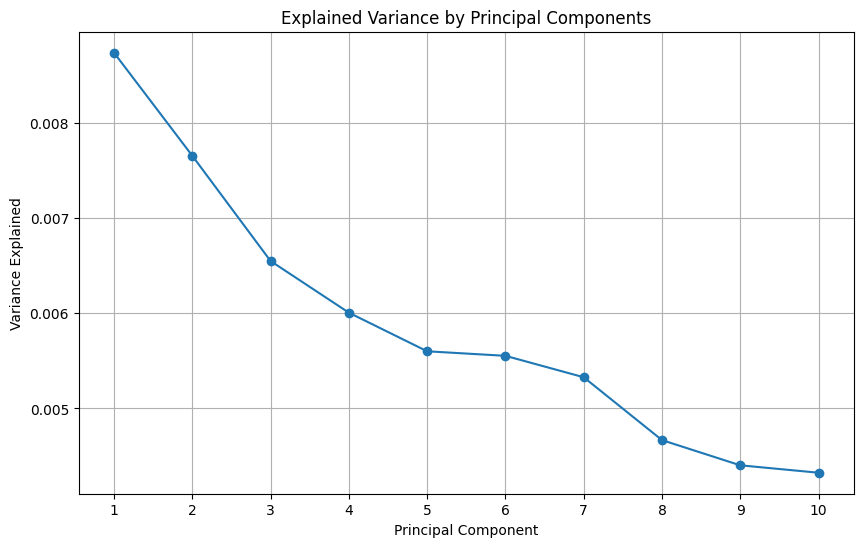

In [99]:
import matplotlib.pyplot as plt

# Assuming pca is your PCA object and you have fitted it
explained_variance = pca.explained_variance_ratio_

# Plotting the explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.grid()
plt.xticks(range(1, len(explained_variance) + 1))
plt.show()


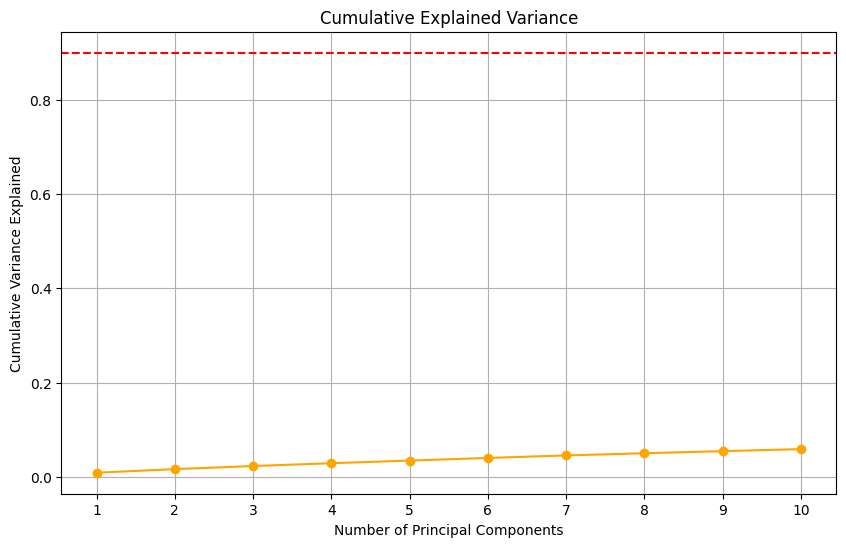

In [100]:
cumulative_variance = explained_variance.cumsum()

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', color='orange')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.grid()
plt.xticks(range(1, len(cumulative_variance) + 1))
plt.axhline(y=0.9, color='r', linestyle='--')  # Example threshold for 90% variance
plt.show()


In [101]:
# Component loadings
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Create a DataFrame for better visualization
loadings_df = pd.DataFrame(loadings, index=numeric_df.columns, columns=[f'PC{i+1}' for i in range(loadings.shape[1])])
print(loadings_df)


                             PC1       PC2       PC3       PC4       PC5  \
RAM_Expandable          0.415343 -0.082800 -0.007137 -0.039245 -0.133078   
RAM                     0.720695  0.019566 -0.329993 -0.006419  0.008674   
Display                 0.430624 -0.140083  0.214374 -0.070329 -0.205387   
SSD                     0.747144  0.018547 -0.359104  0.003975  0.094060   
HDD                    -0.419201 -0.099313  0.395991 -0.066064 -0.278394   
...                          ...       ...       ...       ...       ...   
Ghz_ 4.2 Ghz Processor  0.040877 -0.019272 -0.048553  0.024085  0.088597   
Ghz_ 4.7 Ghz Processor  0.212016 -0.024639 -0.110191  0.001739  0.028728   
Ghz_ 4.8 Ghz Processor  0.320738 -0.027589 -0.221552 -0.010466  0.025589   
Ghz_ 5.5 Ghz Processor  0.170815 -0.021152 -0.091583 -0.014436 -0.028987   
Ghz_0                   0.034464  0.227890  0.037244  0.090439 -0.037523   

                             PC6       PC7       PC8       PC9      PC10  
RAM_Expandab

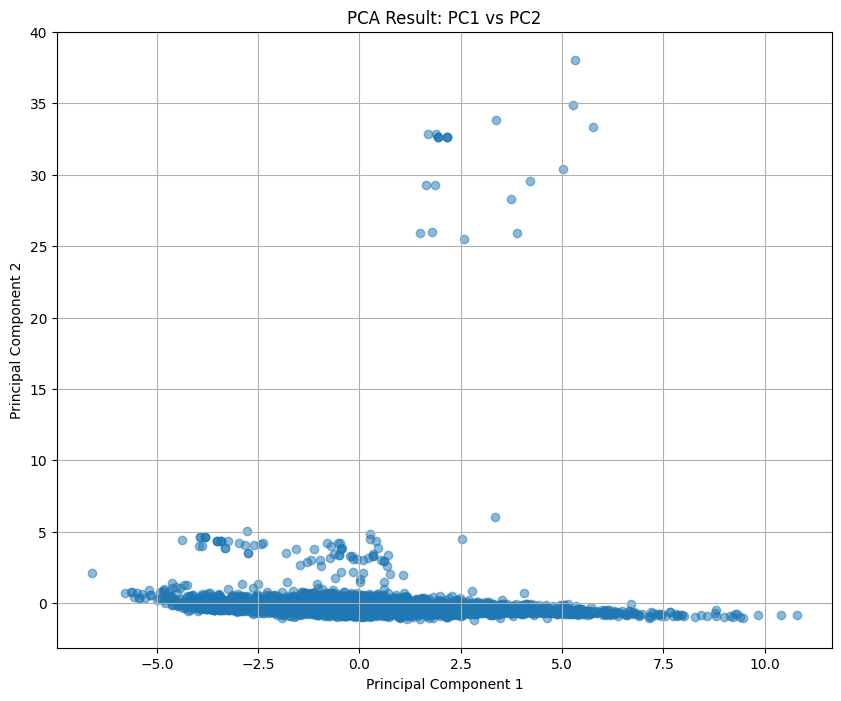

In [102]:
plt.figure(figsize=(10, 8))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
plt.title('PCA Result: PC1 vs PC2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



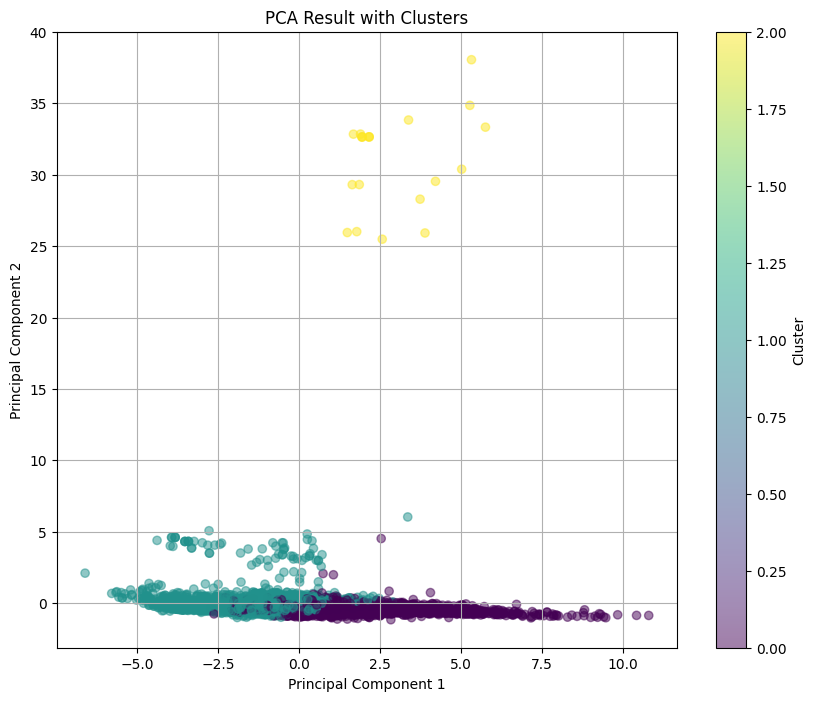

In [103]:
from sklearn.cluster import KMeans

# Applying KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
pca_df['Cluster'] = kmeans.fit_predict(pca_result)

# Scatter plot with clusters
plt.figure(figsize=(10, 8))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=pca_df['Cluster'], cmap='viridis', alpha=0.5)
plt.title('PCA Result with Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()


# Visualizations

In [93]:
import plotly.express as px
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 1. Standardize the data (important for t-SNE)
# Use only the numeric columns, excluding the Price itself for t-SNE
numeric_df = df.select_dtypes(include=[float, int]).drop(columns=['Price'])

scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

# 2. Apply t-SNE (with 3 components for 3D visualization)
tsne = TSNE(n_components=3, random_state=42, perplexity=50, n_iter=1000)
tsne_result = tsne.fit_transform(scaled_data)

# 3. Create a DataFrame for the t-SNE results and include other columns for hover information
tsne_df = pd.DataFrame(data=tsne_result, columns=['Dim1', 'Dim2', 'Dim3'])
tsne_df['Price'] = df2['Price']  # Add the Price column
tsne_df['Brand'] = df2['Brand']  # Add the Brand column
tsne_df['Name'] = df2['Name']    # Add the Laptop Name column

# 4. Create an interactive 3D scatter plot using Plotly
fig = px.scatter_3d(
    tsne_df, x='Dim1', y='Dim2', z='Dim3', color='Price', hover_data=['Name', 'Brand', 'Price'],
    title='3D t-SNE of Laptop Features with Hover Info and Price as Color',
    labels={'Dim1': 't-SNE Dimension 1', 'Dim2': 't-SNE Dimension 2', 'Dim3': 't-SNE Dimension 3'},
    opacity=0.7
)

# 5. Show the interactive plot
fig.show()


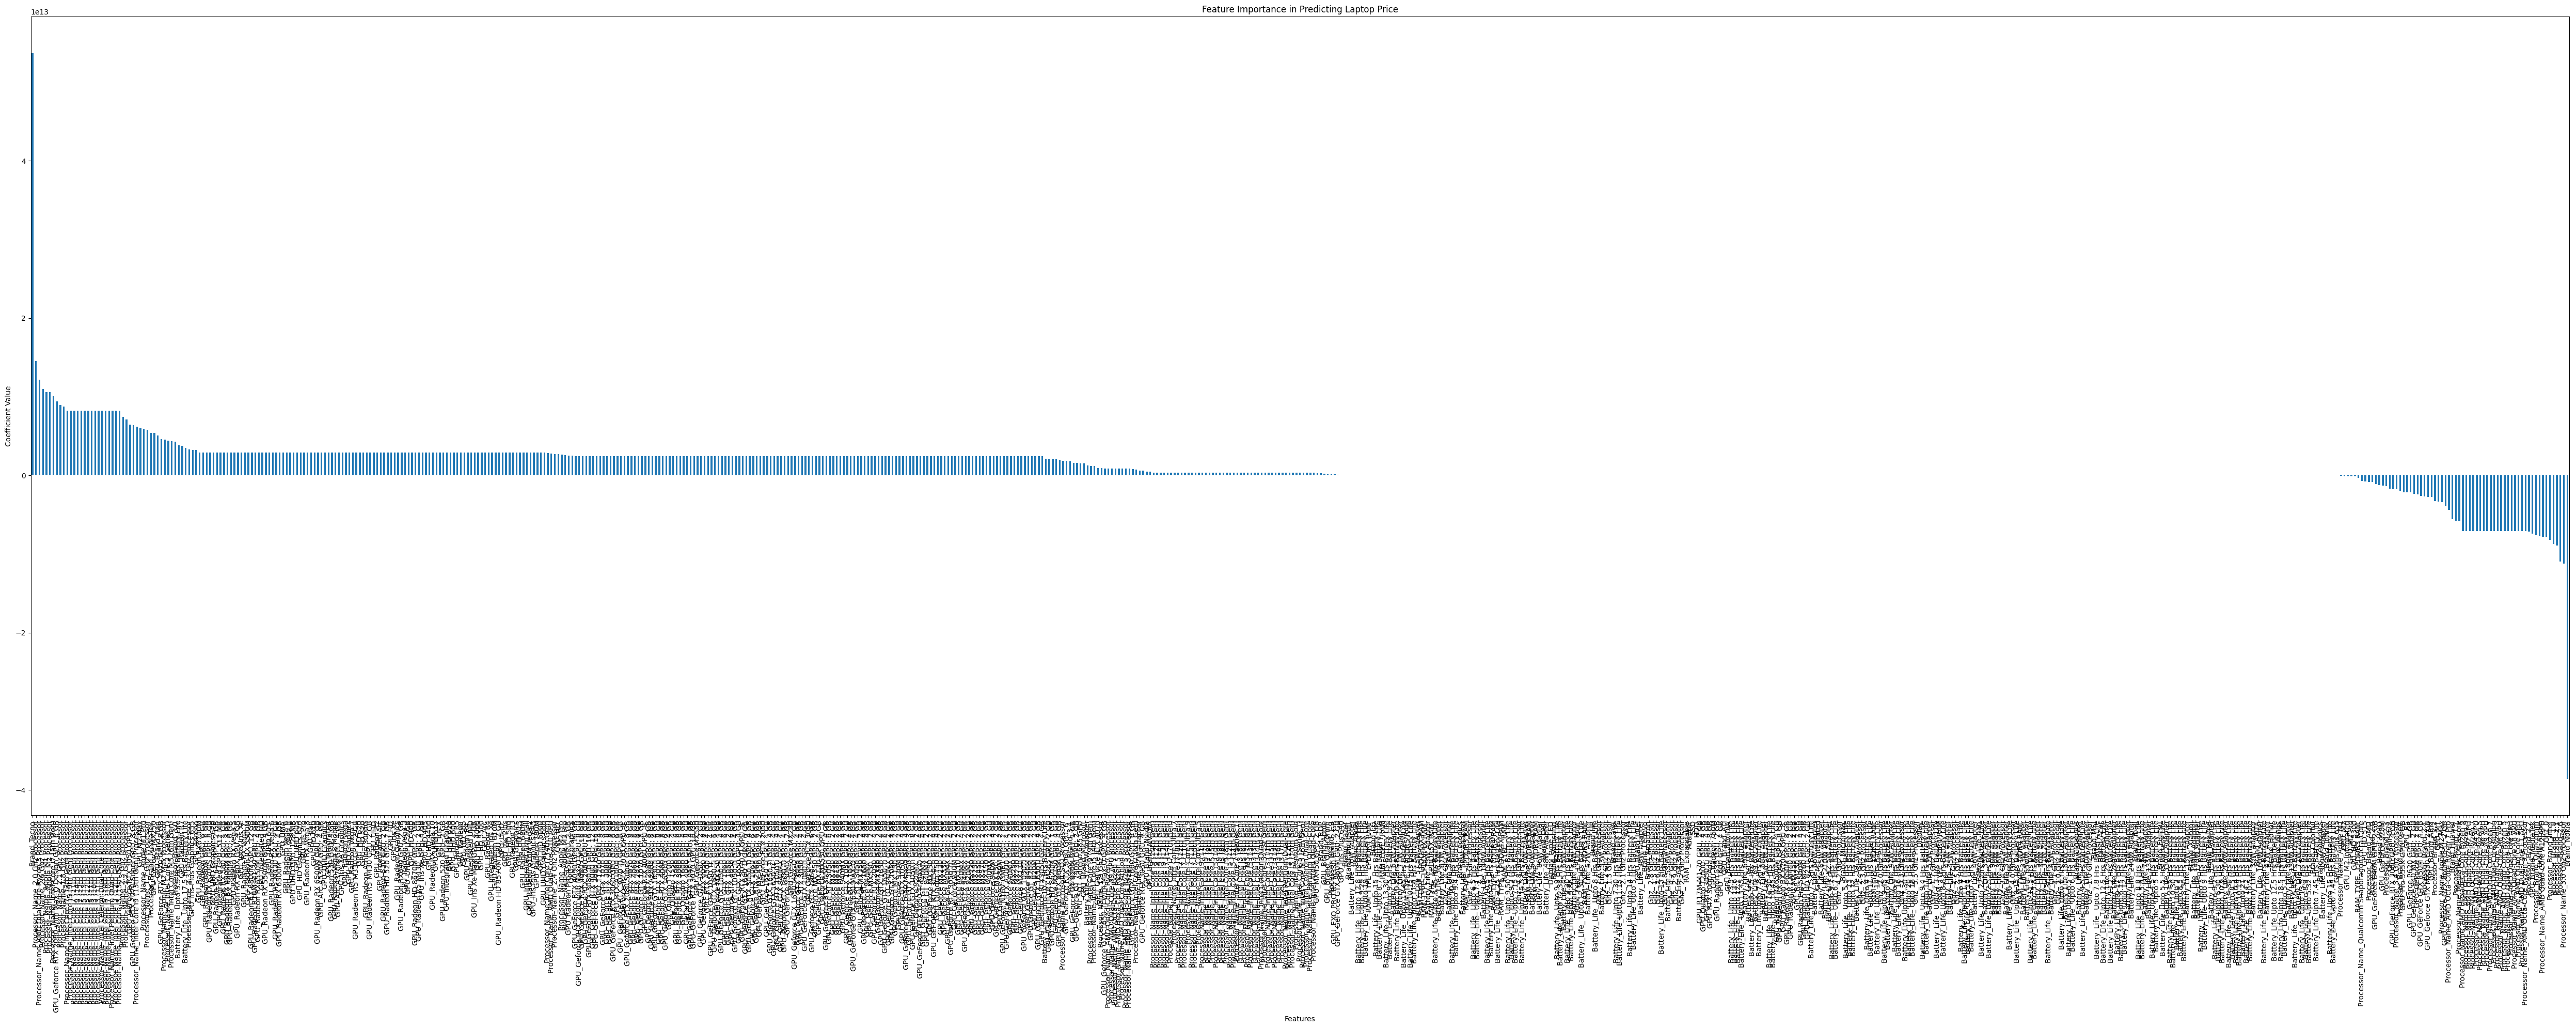

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Sample DataFrame (replace this with your actual DataFrame)
# df = pd.read_csv('your_data.csv')  # Load your dataset here

# Define features and target
X = df.drop(columns=['Price'])  # all features except Price
y = df['Price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Get feature importance
importance = pd.Series(model.coef_, index=X.columns).sort_values(ascending=False)



In [110]:
import plotly.express as px
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Sample DataFrame (replace this with your actual DataFrame)
# df = pd.read_csv('your_data.csv')  # Load your dataset here

# Define features and target
X = df.drop(columns=['Price'])  # all features except Price
y = df['Price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Get feature importance
importance = pd.Series(model.coef_, index=X.columns).sort_values(ascending=False).reset_index()
importance.columns = ['Feature', 'Coefficient Value']

# Create the interactive bar plot
fig = px.bar(importance,
             x='Feature',
             y='Coefficient Value',
             title='Feature Importance in Predicting Laptop Price',
             labels={'Coefficient Value': 'Importance (Coefficient Value)', 'Feature': 'Features'},
             hover_data={'Feature': True, 'Coefficient Value': True})

# Update layout for better visibility
fig.update_layout(xaxis_title='Features',
                  yaxis_title='Coefficient Value',
                  xaxis_tickangle=-45,
                  width=1200,
                  height=600)

# Show the plot
fig.show()


# How many laptops are availabel by each brand

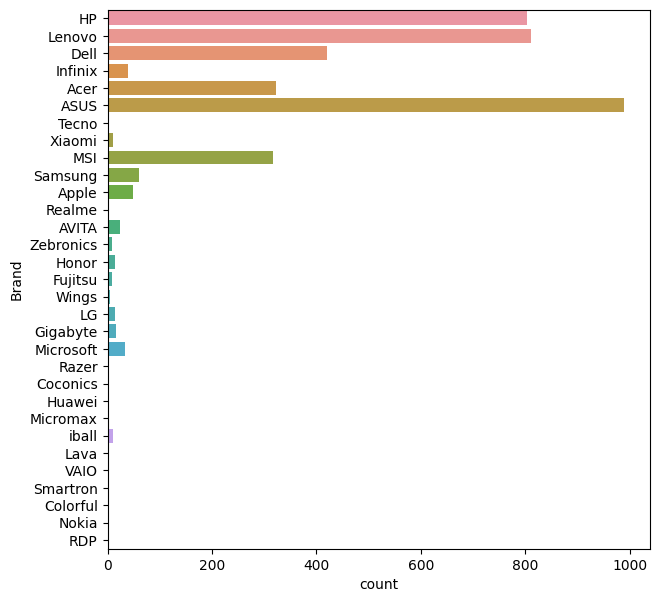

In [12]:
plt.figure(figsize=(7,7))
sns.countplot(y='Brand',data=df)
plt.show()

# Display Types availabel in laptop

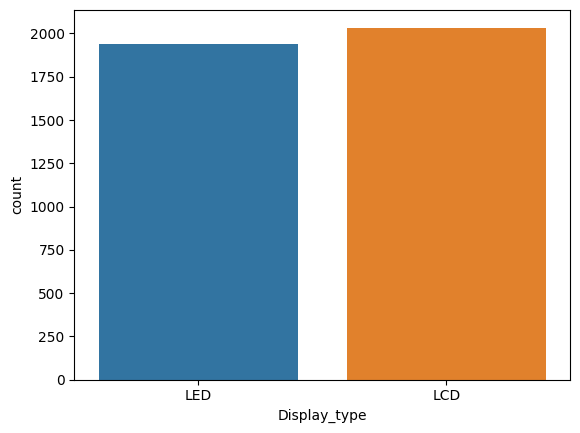

In [13]:
sns.countplot(x='Display_type',data=df)
plt.show()

# Ram Exapansion Range

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='RAM_Expandable', ylabel='Count'>

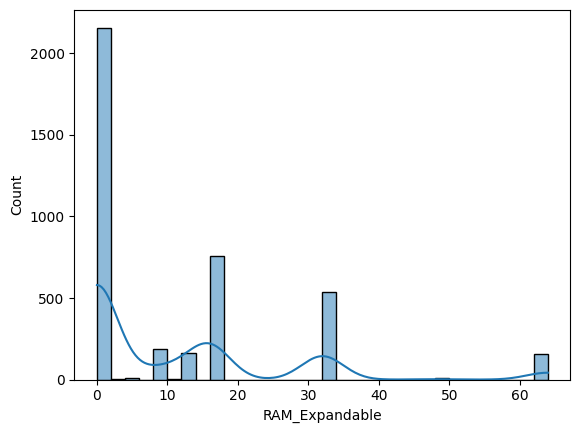

In [14]:
sns.histplot(df['RAM_Expandable'],kde=True)

# GPU's Used in laptops

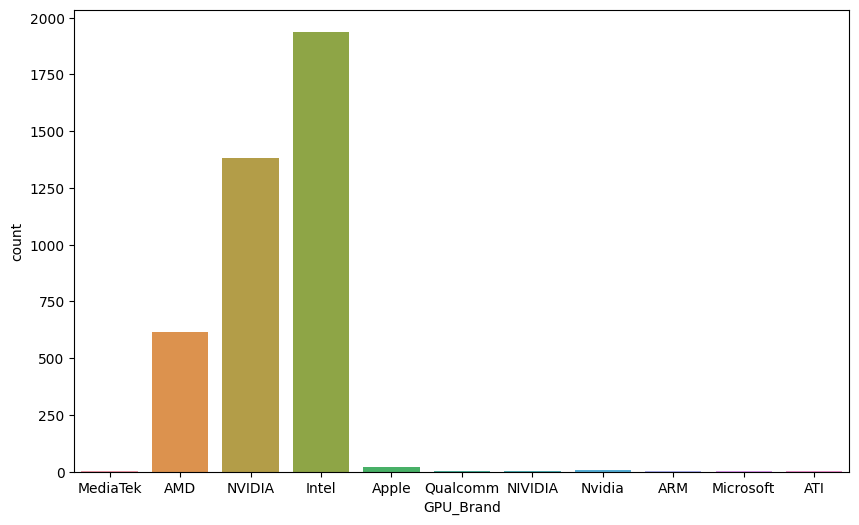

In [15]:
plt.figure(figsize=(10,6))
sns.countplot(x='GPU_Brand',data=df)
plt.show()

# Count Plot for HDD's

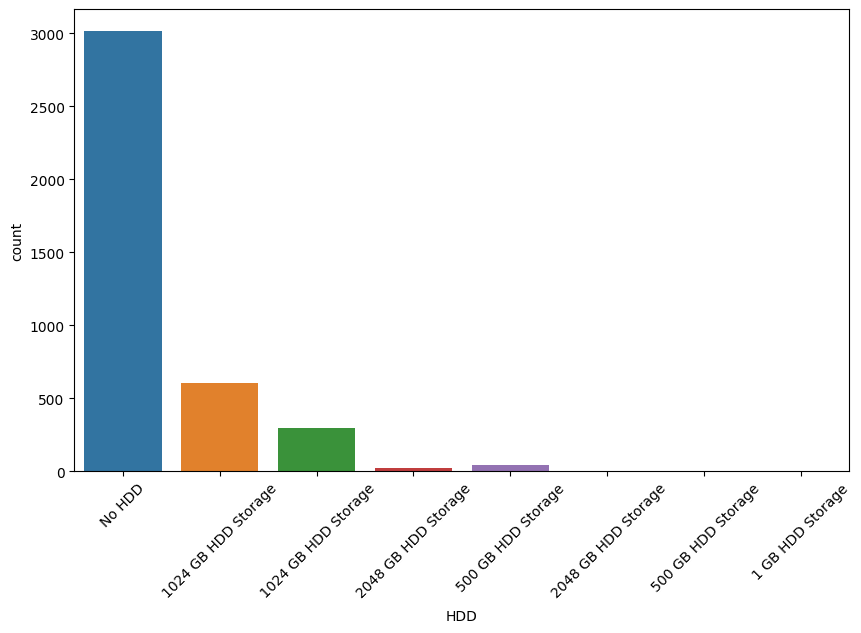

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(x='HDD',data=df)
plt.xticks(rotation=45)
plt.show()

# Adapter Options in Laptops

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Adapter', ylabel='Count'>

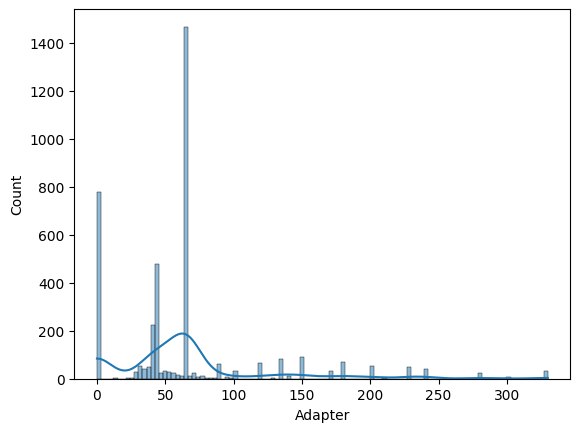

In [17]:
sns.histplot(df['Adapter'],kde=True)

# Ram options availabel in laptops

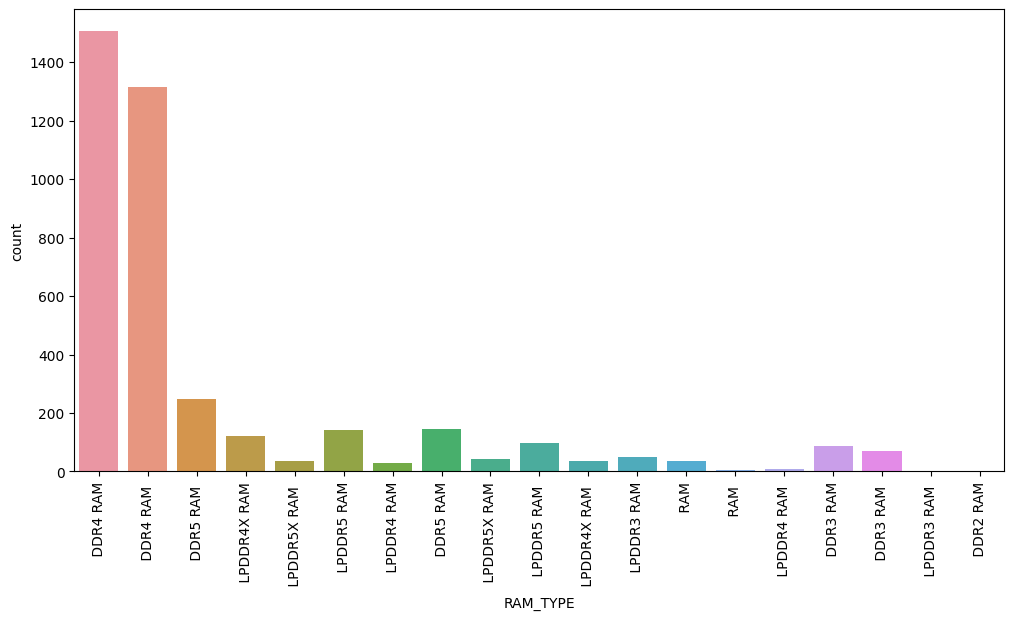

In [18]:
plt.figure(figsize=(12,6))
sns.countplot(x='RAM_TYPE',data=df)
plt.xticks(rotation=90)
plt.show()

# Histogram for Display sizes

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Display', ylabel='Count'>

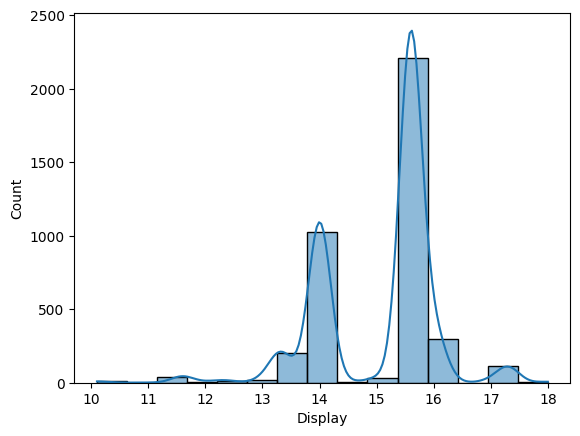

In [19]:
sns.histplot(df['Display'],kde=True,bins=15)

# Processor Ghz range in laptops

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Ghz', ylabel='Count'>

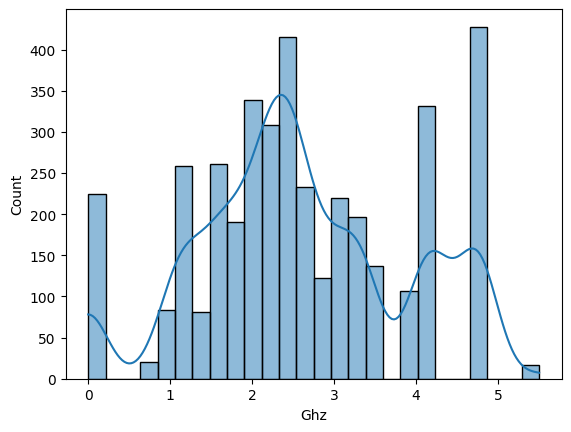

In [20]:
sns.histplot(df['Ghz'],kde=True)

# List of most expensive laptops by each brand

In [21]:
most_expensive_by_brand = df.loc[df.groupby('Brand')['Price'].idxmax()]
most_expensive_by_brand.T

2752  \
Brand                                                         ASUS   
Name             ASUS ROG Strix Scar 17 SE G733CX-LL012WS Lapto...   
Price                                                       420990   
Processor_Name                            Intel Core i9 (12th Gen)   
Processor_Brand                                              Intel   
RAM_Expandable                                                  64   
RAM                                                             32   
RAM_TYPE                                                 DDR5 RAM    
Ghz                                                            2.3   
Display_type                                                   LCD   
Display                                                       17.3   
GPU                                 GeForce RTX 3080 Ti GPU, 16 GB   
GPU_Brand                                                   NVIDIA   
SSD                                                           4098   
HDD                                                         No HDD   
Adapter                                                        330   
Battery_Life                                          330W Adapter   

                                                              1274  \
Brand                                                        AVITA   
Name             AVITA Admiror NS14A5INR672-FC Laptop (14 Inch ...   
Price                                                       132590   
Processor_Name                            Intel Core i7 (10th Gen)   
Processor_Brand                                              Intel   
RAM_Expandable                                                   0   
RAM                                                             16   
RAM_TYPE                                                  DDR4 RAM   
Ghz                                                            1.8   
Display_type                                                   LCD   
Display                                                       14.0   
GPU                                               UHD Graphics 620   
GPU_Brand                                                    Intel   
SSD                                                            512   
HDD                                                         No HDD   
Adapter                                                         65   
Battery_Life                              Upto 10 Hrs Battery Life   

                                                              2654  \
Brand                                                         Acer   
Name             Acer Predator Helios 16 PH16-72 (NH.QNZSI.002)...   
Price                                                       247990   
Processor_Name                            Intel Core i9 (14th Gen)   
Processor_Brand                                              Intel   
RAM_Expandable                                                  32   
RAM                                                             32   
RAM_TYPE                                                 DDR5 RAM    
Ghz                                                            1.6   
Display_type                                                   LCD   
Display                                                       16.0   
GPU                                    GeForce RTX 4080 GPU, 12 GB   
GPU_Brand                                                   NVIDIA   
SSD                                                           1024   
HDD                                                         No HDD   
Adapter                                                        330   
Battery_Life                                          330W Adapter   

                                                              699   \
Brand                                                        Apple   
Name             Apple MacBook Pro M2 Max MNWA3HN/A Ultrabook (...   
Price                                                       349900   

# Highest Ram size laptop availabel by each brand

In [22]:
highest_ram_by_brand = df.groupby('Brand')['RAM'].max().reset_index()
result = pd.merge(highest_ram_by_brand, df, on=['Brand', 'RAM'])
result.T

0    \
Brand                                                         ASUS   
RAM                                                             32   
Name             ASUS Zenbook 14X OLED Space Edition UX5401ZAS-...   
Price                                                       169990   
Processor_Name                            Intel Core i9 (12th Gen)   
Processor_Brand                                              Intel   
RAM_Expandable                                                   0   
RAM_TYPE                                                LPDDR5 RAM   
Ghz                                                            2.5   
Display_type                                                   LED   
Display                                                       14.0   
GPU                                                        Iris Xe   
GPU_Brand                                                    Intel   
SSD                                                           1024   
HDD                                                         No HDD   
Adapter                                                        100   
Battery_Life                              Upto 10 Hrs Battery Life   

                                                               1    \
Brand                                                         ASUS   
RAM                                                             32   
Name             ASUS ROG Zephyrus Duo 16 GX650RMZ-LS019WS Lapt...   
Price                                                       251990   
Processor_Name                               AMD Octa-Core Ryzen 7   
Processor_Brand                                                AMD   
RAM_Expandable                                                  64   
RAM_TYPE                                                 DDR5 RAM    
Ghz                                                            4.7   
Display_type                                                   LCD   
Display                                                       16.0   
GPU                                     GeForce RTX 3060 GPU, 6 GB   
GPU_Brand                                                   NVIDIA   
SSD                                                           2048   
HDD                                                         No HDD   
Adapter                                                         65   
Battery_Life                               Upto 8 Hrs Battery Life   

                                                               2    \
Brand                                                         ASUS   
RAM                                                             32   
Name             ASUS ROG Strix Scar 17 G733ZW-LL105WS Laptop (...   
Price                                                       268965   
Processor_Name                            Intel Core i9 (12th Gen)   
Processor_Brand                                              Intel   
RAM_Expandable                                                   0   
RAM_TYPE                                                  DDR4 RAM   
Ghz                                                            4.8   
Display_type                                                   LCD   
Display                                                       17.3   
GPU                                  GeForce RTX 3070 Ti GPU, 8 GB   
GPU_Brand                                                   NVIDIA   
SSD                                                           2048   
HDD                                                         No HDD   
Adapter                                                         90   
Battery_Life                              Upto 10 Hrs Battery Life   

                                                               3    \
Brand                                                         ASUS   
RAM                                                             32   
Name             ASUS ROG Strix Scar 15 G533ZXZ-LN116WS Laptop ...   


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Assuming df is your DataFrame and the target variable is 'Price'

# Step 1: Define features and target
X = df.drop(columns=['Price'])  # Features
y = df['Price']  # Target variable

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize the Decision Tree Regressor
decision_tree = DecisionTreeRegressor(random_state=42)

# Step 4: Fit the model on the training data
decision_tree.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = decision_tree.predict(X_test)

# Step 6: Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

# Step 7: Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(decision_tree, filled=True, feature_names=X.columns, rounded=True, fontsize=14)
plt.title('Decision Tree for Laptop Price Prediction', fontsize=20)
plt.show()


Mean Squared Error: 846580971.44
R^2 Score: 0.71


Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7a00cbbfb310>>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 
